In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

pd.set_option('display.float_format', lambda x: '%.5f' % x)

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


In [14]:
google_play_data = pd.read_csv('googleplaystore.csv')
google_play_reviews_data = pd.read_csv('googleplaystore_user_reviews.csv')

### Обработка данных

In [15]:
google_play_data.loc[google_play_data['Type'] == '0', 'Type'] = np.nan
google_play_data.loc[google_play_data['Category'] == '1.9', 'Category'] = np.nan

In [16]:
google_play_data['Installs'] = google_play_data['Installs'].str.replace('+', '', regex=False)
google_play_data['Installs'] = google_play_data['Installs'].str.replace(',', '', regex=False)

In [17]:
google_play_data.loc[google_play_data['Installs'].isin(['0', 'Free']), 'Installs'] = np.nan
google_play_data['Installs'] = pd.to_numeric(google_play_data['Installs'])

In [19]:
google_play_data['Reviews'] = google_play_data['Reviews'].str.replace('.0M', '000000', regex=False)


In [21]:
google_play_data['Reviews'] = pd.to_numeric(google_play_data['Reviews'])

In [22]:
google_play_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10000,159,19M,10000.00000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90000,967,14M,500000.00000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70000,87510,8.7M,5000000.00000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50000,215644,25M,50000000.00000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30000,967,2.8M,100000.00000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
google_play_reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00000,0.53333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25000,0.28846
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40000,0.87500
4,10 Best Foods for You,Best idea us,Positive,1.00000,0.30000


### Bar plot

In [24]:
apps_by_category = google_play_data.pivot_table(values='App', index = ['Category', 'Type'], aggfunc='count', fill_value=0).reset_index()
apps_by_category.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,62
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53


In [25]:
top_paid_apps = apps_by_category[apps_by_category.Type == 'Paid'].sort_values(by='App', ascending=False).head(10)

In [26]:
top_free_apps = apps_by_category[apps_by_category.Type == 'Free'].sort_values(by='App', ascending=False).head(10)

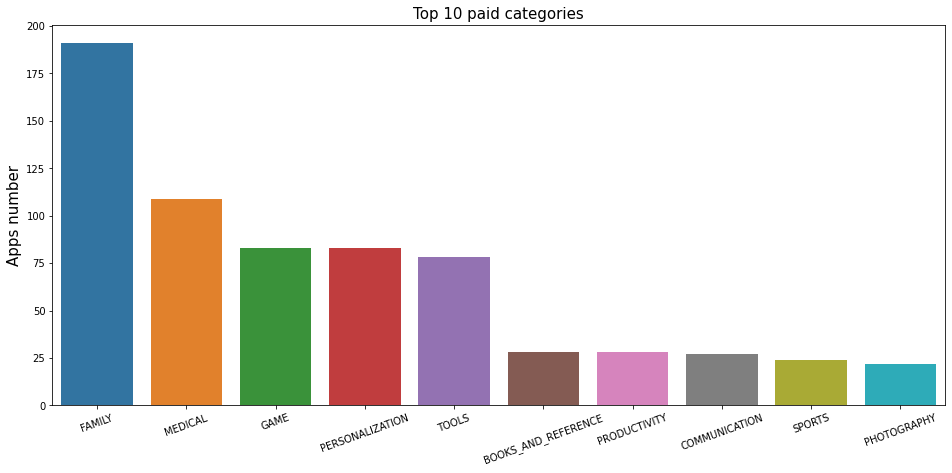

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

ax = sns.barplot(x="Category", y="App", data=top_paid_apps)
ax.set_ylabel('Apps number', fontsize=15)
ax.tick_params(axis='x', labelsize=10, rotation=20)
ax.set_xlabel('')
ax.set_title('Top 10 paid categories', size=15);

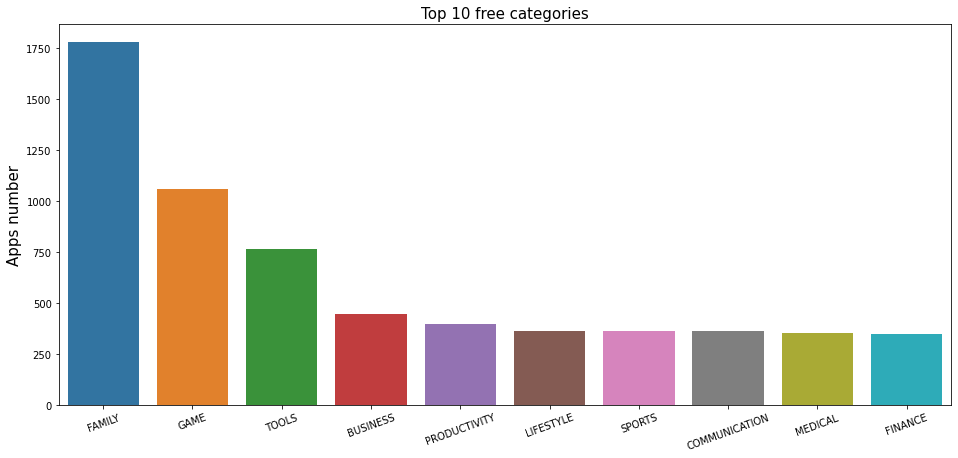

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

ax = sns.barplot(x="Category", y="App", data=top_free_apps)
ax.set_ylabel('Apps number', fontsize=15)
ax.tick_params(axis='x', labelsize=10, rotation=20)
ax.set_xlabel('')
ax.set_title('Top 10 free categories', size=15);

Чаще всего в данных представленны приложения категории "Семейные", как в платных, так и в бесплатных играх. В остальном распределение категорий отличается. В платных приложениях популярнее медицинские приложения, приложения для персонализации, приложения для чтения и фотографий. В бесплатных преобладают игры, различные сервисные приложения, приложения для бизнеса, продуктивности, спорта и финансов.

### Boxplot

Оценим рейтинг приложений

In [29]:
google_play_data['Rating'].describe()

count   9367.00000
mean       4.19334
std        0.53743
min        1.00000
25%        4.00000
50%        4.30000
75%        4.50000
max       19.00000
Name: Rating, dtype: float64

Видно, что есть нестандартный рейтинг, уберем запись с ним.

In [30]:
google_play_data = google_play_data[google_play_data.Rating != 19]

<AxesSubplot:xlabel='Rating'>

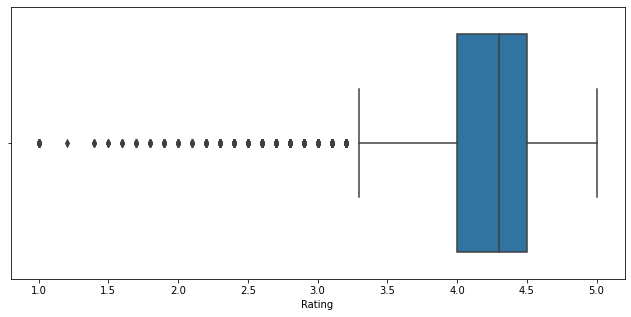

In [31]:
sns.boxplot(x="Rating", data=google_play_data)

В основном приложения имеют рейтинг от 4 до 4.5. Мало приложений с рейтингом ниже 3.25.

### Scatter plot

<AxesSubplot:title={'center':'Correlation between Rating and Reviews number'}, xlabel='Rating', ylabel='Reviews'>

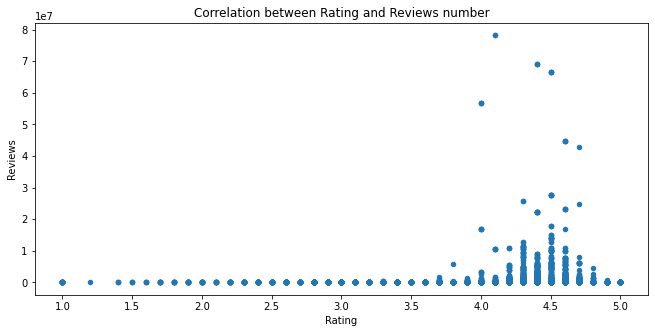

In [32]:
google_play_data.plot(kind='scatter', 
                        x='Rating', 
                        y='Reviews', 
                        title='Correlation between Rating and Reviews number')

Среди приложений с низким рейтингом, редко встречаются приложения, у которых было много отзывов. Приложения с большим кол-вом отзывов как правило имеют оценки от 4 до 4.8.

### Heat map

Выделим топ приложений по категориям для анализа

In [33]:
top_apps_by_category = google_play_data.pivot_table(values='App', index = 'Category', aggfunc='count', fill_value=0).reset_index()
top_apps_by_category = top_apps_by_category.sort_values(by='App', ascending=False).head(10)

In [34]:
install_category = google_play_data[(google_play_data['Installs'] >= 1000) & google_play_data['Category'].isin(top_apps_by_category['Category'])].pivot_table(
                                    index='Category', 
                                    columns='Installs', 
                                    values='App', 
                                    aggfunc='count').fillna(0)

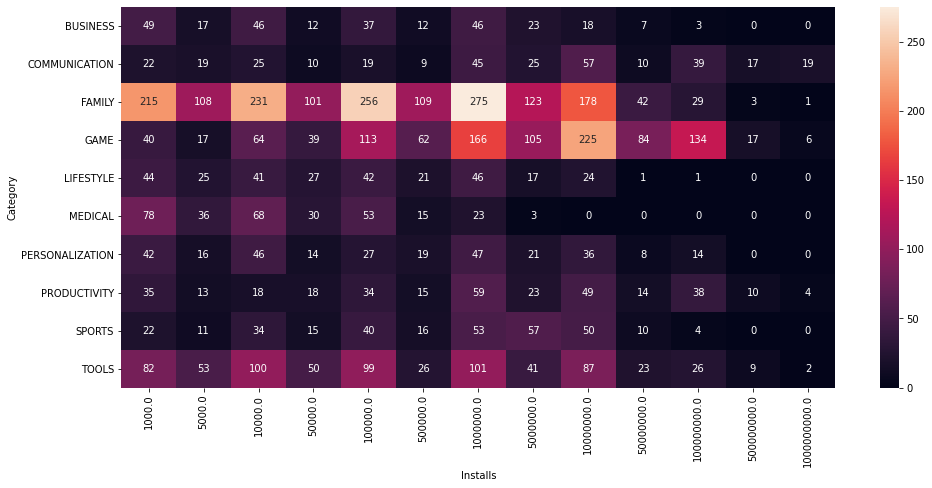

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

ax = sns.heatmap(install_category, annot = True, fmt='g')

Семейные приложения были установлены чаще всего в категории - 1 млн установок. У игр распределение числа установок сдвинуто в сторону большого числа установок (до 100 млн). Во всех категориях были редки приложения с числом установок в категориях 500 млн и 1 млрд. Самыми популярными по установкам были социальные приложения (различные соц. сети).

### KDE plot

<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

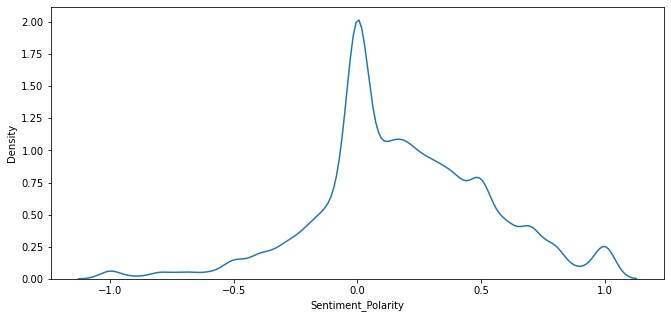

In [79]:
sns.kdeplot(data=google_play_reviews_data, x="Sentiment_Polarity")

<AxesSubplot:xlabel='Sentiment_Subjectivity', ylabel='Density'>

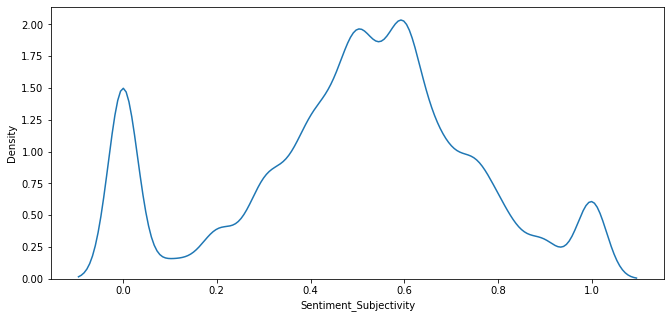

In [80]:
sns.kdeplot(data=google_play_reviews_data, x="Sentiment_Subjectivity")

Полярность отзывов больше смещена в положительную сторону. По субъективность отзывов имеет несколько ярко выраженных пиков. Основная масса приложений имеет среднюю оценку субъективности. Далее идет ряд приложений с объективными отзывами. Такиж приложений больше, чем приложений с полностью субъективными отзывами.

### Word Cloud

Идея для визуализации была взята [отсюда](https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5).

In [92]:
positive_text = ' '.join(google_play_reviews_data[google_play_reviews_data['Sentiment'] == 'Positive']['Translated_Review'])
negative_text = ' '.join(google_play_reviews_data[google_play_reviews_data['Sentiment'] == 'Negative']['Translated_Review'])

In [90]:
# фукция для отрисовки облака слов
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 15))
    plt.imshow(wordcloud) 
    plt.axis("off");

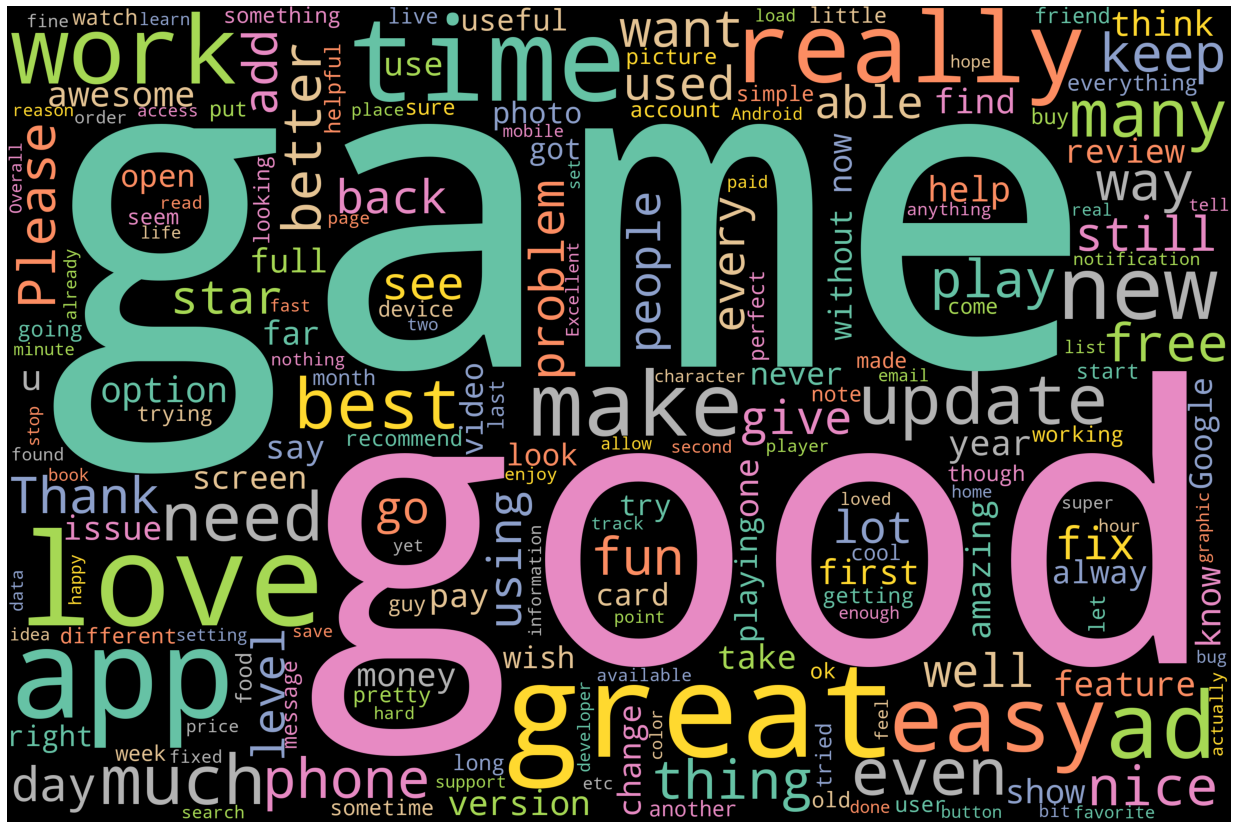

In [91]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(positive_text)
plot_cloud(wordcloud)

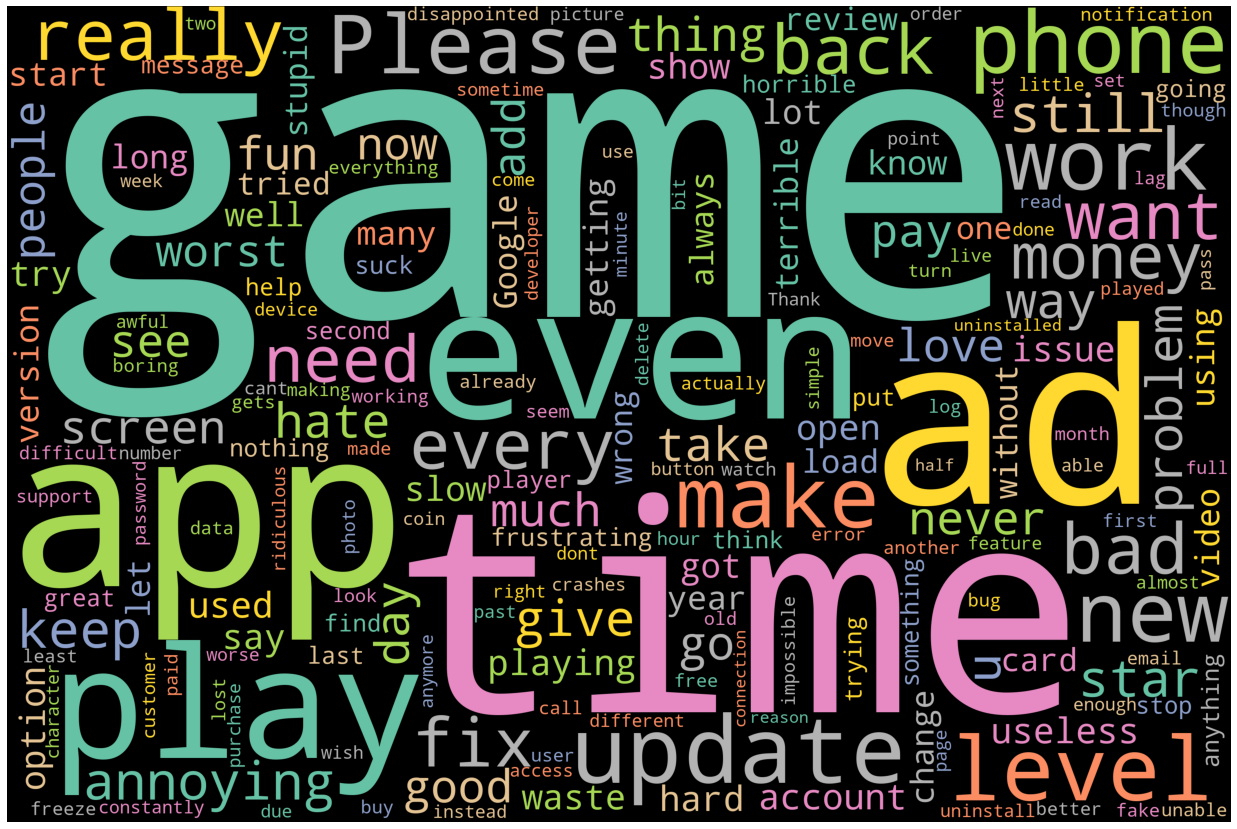

In [94]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(negative_text)
plot_cloud(wordcloud)

В позитивных отзывах отмечается простота игр, удовольствие, получаемое от игры. В отрицательных отзывах чаще упоминаются слова про обновления, проблемы и баги, то, что приложение раздражает и в нем есть реклама.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.